In [1]:
# Import the librarys
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Access the input data (images) and the target labels
x = mnist.data.to_numpy()
y = mnist.target.to_numpy()

# Print the shape of the data
print("The shape of the data:", x.shape)
print("The shape of the labels:", y.shape)

The shape of the data: (70000, 784)
The shape of the labels: (70000,)


In [4]:
# define a function for printing some random images
def print_rand_img(data,target):
  # Generate eight random indices for ploting the images
  random_indices = np.random.choice(data.shape[0], 8, replace=False)

  # Plot the images
  fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
  for i, ax in enumerate(axes.flat):
      image = data[random_indices[i]].reshape(28, 28)
      # Make the images invert color
      image = 255 - image
      ax.imshow(image, cmap='gray')
      ax.set_title(f"Image {i} with label {target[random_indices[i]]}")
      ax.axis('off')

  plt.tight_layout()
  plt.show()

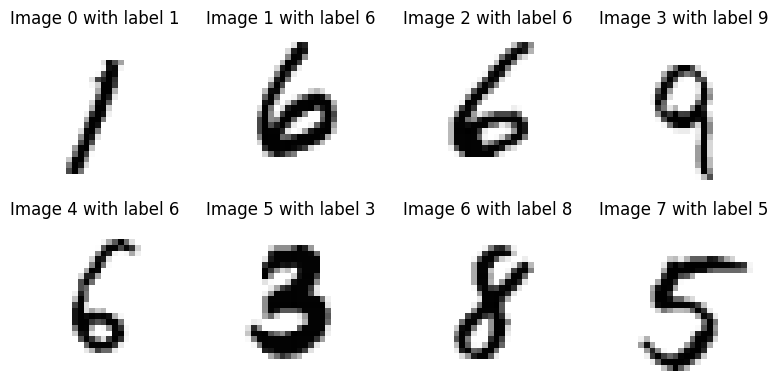

In [5]:
print_rand_img(x,y)

In [6]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"The shape of the x_train: {x_train.shape}")
print(f"The shape of the y_train: {y_train.shape}")
print(f"The shape of the x_test: {x_test.shape}")
print(f"The shape of the y_test: {y_test.shape}")

The shape of the x_train: (56000, 784)
The shape of the y_train: (56000,)
The shape of the x_test: (14000, 784)
The shape of the y_test: (14000,)


In [7]:
# Adding noise to the images
x_train_noisy = x_train + np.random.randint(1, 70, size=x_train.shape)
x_test_noisy = x_test + np.random.randint(1, 70, size=x_test.shape)

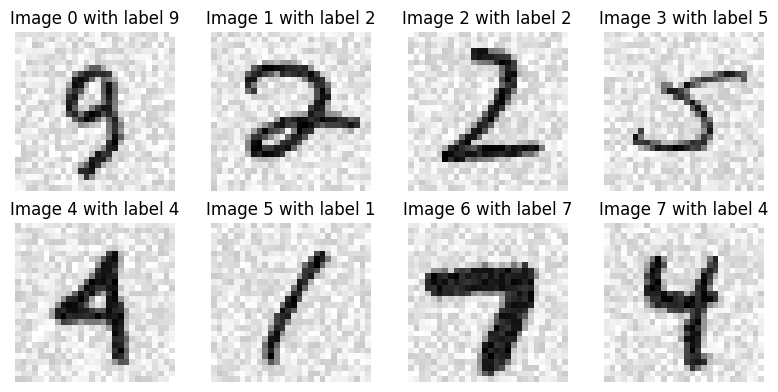

In [8]:
print_rand_img(x_train_noisy,y_train)

In [9]:
# Classification using KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_noisy, x_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Define a function for printing final random images
def rand_img(data):
  # Generate a random indices for ploting final images
  random_index = np.random.choice(data.shape[0], 1, replace=False)

  # Predict the unnoisy image
  image_noisy = data[random_index[0]].reshape(28, 28)
  image_noisy = 255 - image_noisy

  # The noisy image
  image = knn.predict([data[random_index[0]]]).reshape(28, 28)
  image = 255 - image

  # Plot the images
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 2))
  axes[0].imshow(image_noisy, cmap='gray')
  axes[0].set_title('Before')
  axes[0].axis('off')  
  axes[1].imshow(image, cmap='gray')
  axes[1].set_title('After')
  axes[1].axis('off')    
  plt.tight_layout()
  plt.show()

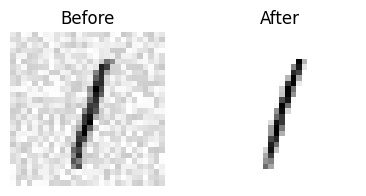

In [11]:
rand_img(x_test_noisy)